[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tuankhoin/COMP30027-Practical-Solutions/blob/main/2023/Week%204.ipynb)

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
path = "gdrive/My Drive/COMP30027 (T) 2023/week4/"

Mounted at /content/gdrive


#### The University of Melbourne, School of Computing and Information Systems
# COMP30027 Machine Learning, 2023 

## Week 4 - Naive Bayes, metrics and `sklearn` 101

---
## Theoretical questions



### Q1
For the following set of classification problems, design a Naive Bayes classification model. Answer the following questions for each problem: 
- (i) what are the instances, what are the features (and values)? 
- (ii) explain which distributions you would choose to model the observations
- (iii) explain the significance of the Naive Bayes assumption.

#### a: You want to classify a set of images of animals in to 'cats', 'dogs', and 'others'.
- Instance: images
- Features: pixels
- Feature type: continuous ▶ Gaussian looking feasible
- NB assumption: All pixels are independent ▶ Truth: adjacent pixels can and usually are continuous

#### b: You want to classify whether each customer will purchase a product, given all the products they bought previously.
- Instance: Customer
- Features: products
- Feature type: binary (purchased or not) or continuous (how many times purchased) ▶ Bernoulli for binary or Multinomial for looking feasible
- NB assumption: Decision to purchase different products are independent ▶ Truth: there can be reasons to purchase one product along with another (promotion, series products, ingredients, etc.)

### Q2
#### (i) What is Discretisation, and where might it be used?

- Discretization is **transforming** **continuous** data into a set of **discrete** categories or intervals. 
- It is often used in data pre-processing for machine learning tasks, particularly when **dealing with continuous features that need to be converted into categorical features** for analysis or modelling. 

> Many machine learning algorithms, such as decision trees and Multinominal Naive Bayes, work best with categorical features rather than continuous ones. Additionally, discretization can  reduce noise and increase interpretability of the data, by grouping similar values together and identifying patterns in the data.

#### (ii) Discretise the attribute C of below dataset according to the (unsupervised) methods of equal width, equal frequency, and k-means (break ties where necessary).

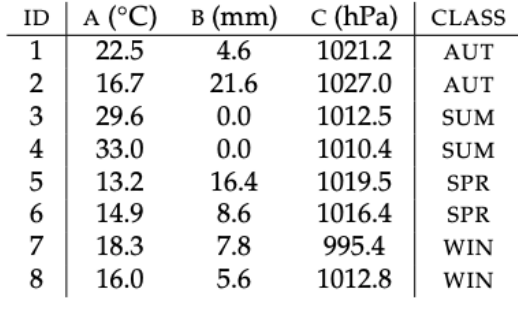

##### Answer
Can be useful to do a sorting on the values first:
> 995.4 ▶ 1010.4 ▶ 1012.5 ▶ 1012.8 ▶ 1016.4 ▶ 1019.5 ▶ 1021.2 ▶ 1027.0
- Max difference is 31.6

- Equal width: just divide the max difference to get the bin length
- Equal length: divide the sorted instance to equal batches. If needed a boundary, maybe find a median value
- K-means:
  - Randomly get k points and call them centers
  - Allocate each instance to nearest centers
  - Recalculate each center as means of the mean of allocated values
  - Rinse and repeat 

### Q3: How is holdout evaluation different to cross-validation evaluation? What are some reasons we would prefer one strategy over the other?

- Hold-out: partition the data into a training set and a test set. We build the model on the former and evaluate on the latter.
- Cross-validation: same as above, but a number of times, where each iteration uses one partition of the data as a test set and the rest as a training set (and the partition is different each time).

Holdout is subject to some random variation, depending on which instances are assigned to the training data, and which are assigned to the test data. Any instance that forms part of the model is excluded from testing, and vice versa.

Cross validation can solve the above problems, but takes more time to do so. So choosing a preference will depends on how much time you want to use.

### Q4
 A confusion matrix is a summary of the performance of a (supervised) classifier over a set of development (“test”) data, by counting the various instances

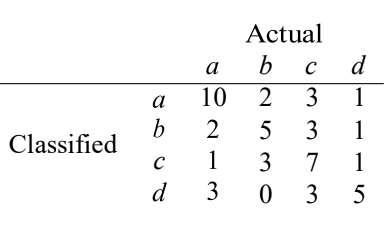

#### (i). Calculate the classification accuracy of the system. Find the error rate for the system.

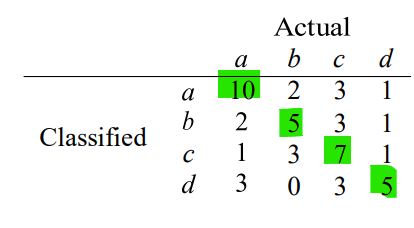

Accuracy is just the sum of the green bits divided by the sum of all elements in the matrix. You should get 54%.

Error rate is just `100% - accuracy`, which you will get 46%.

#### (ii). Calculate the precision, recall, and F-score (where β = 1) for class d.

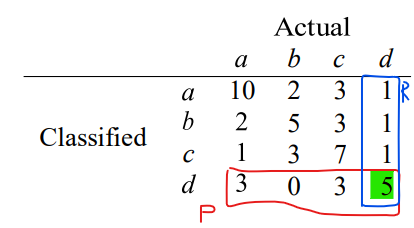

You are divding the correct guesses over the sums (wrapped in red and blue for percision and recall respectively). You should get around 45% percision and 62% recall.

And you can calculate F-score with $\beta=1$ (also called F-1 score) as $F_1 = \frac{(1+\beta^2)PR}{\beta^2P+R}=\frac{2PR}{P+R} \approx 53\%$

#### (iii). Why can’t we do this for the whole system? How can we consider the whole system?

- Percision and recall are used on a single class, ususally on a specific class of interest.
- To consider all, the metrics have to be done for each class then aggregare together.
- You have learnt some averaging methods: micro and macro average
- Aggregation choice depends on what you want:
  - Macro might be good to oversee the whole system behavior, which includes small groups as it treats all class equally.
  - Micro might be good to see the main system behaviors (in large group), as it is mostly affected by large groups.

---
## Coding exercises

This week, we will be using `scikit-learn` to classify some data, and to evaluate some classifiers.

Scikit-learn is a popular Python library for machine learning that provides a wide range of tools for data preprocessing, modeling, and evaluation. It is built on top of NumPy, SciPy, and Matplotlib, and is designed to be easy to use and efficient for both small and large-scale machine learning tasks.

Scikit-learn includes a variety of machine learning algorithms, such as classification, regression, clustering, and dimensionality reduction, and provides a consistent API for using these algorithms. It also includes tools for feature extraction, selection, and scaling, as well as for evaluating and optimizing machine learning models.



In [ ]:
import numpy as np
import pandas as pd

from sklearn import datasets
import matplotlib.pyplot as plt

### Exercise 1.
Please load Car Evaluation dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data).


The common terminology in scikit-learn is that: 
* `X`: the array defining the attribute values
* `y`: the array defining the gold–standard (“ground truth”) 

Your task: create these variables for the car data.

- **(a)** Load the data into a suitable format for scikit-learn:
```python
data = pd.read_csv('car.data', header = None)
X = ...
y = data.iloc[:,-1]
```

In [ ]:
data = pd.read_csv(path + 'car.data', header = None)
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

#### Some other possible ways to read in csv files:

Old school:
```python
X = []
y = []
with open(path+'car.data', mode='r') as fin:
    for line in fin:
        atts = line.strip().split(",")
        X.append(atts[:-1]) #all atts, excluding the class
        y.append(atts[-1])
```

High school:
```python
data_np = np.genfromtxt(path+"car.data", encoding=None, dtype=None, delimiter=",")

X_np = data_np[:,:-1]
y_np = data_np[:,-1]
```

COMP10002:
```python
# Define the mAgiC nUMbERs
fname = 'car.data'
last_index = -1
m = 'r'

# Initiate variables
X = []
y = []

# Open the file
with open(path + fname, mode=m) as fin:
    # Do a loop to reach each row of data
    for line in fin:
      # Strip trailing spaces
      stripped = line.strip()
      # Split into an array of values that are separated by coma
      atts = stripped.split(",")
      # Because last column is class, remove it from instances variable
      X.append(atts[:,:last_index])
      # Last column is the class, or as known as ground-truth, labels, golden standard,...
      y.append(atts[:,last_index])
```

- **(b)** How many instances are there in this collection? How many attributes, and of what type(s)? What is the class we’re trying to predict, and how many values does it take?

```python
from collections import Counter
print('There are', ..., 'instances')
print('There are', ..., "attributes")

unique_labels, label_counts = np.unique(y, return_counts=True)

print('There are', len(unique_labels), "class labels:", unique_labels)   
#use Counter to count the number of labels
label_counter = Counter(y)
print("Label frequencies:", list(zip(unique_labels, label_counts)))
```

In [ ]:
print('There are', len(X), 'instances')
print('There are', len(X.columns), "attributes")

# 1st way: Use np.unique to count
unique_labels, label_counts = np.unique(y, return_counts=True)
print('There are', len(unique_labels), "class labels:", unique_labels)   
print("Label frequencies:", list(zip(unique_labels, label_counts)))

# 2nd way: Use collections.Counter() and set() to count
from collections import Counter
print('There are', len(set(y)), "class labels:", set(y))   
label_counter = Counter(y)
print("Label frequencies: %s" %str(label_counter.most_common()))

There are 1728 instances
There are 6 attributes
There are 4 class labels: ['acc' 'good' 'unacc' 'vgood']
Label frequencies: [('acc', 384), ('good', 69), ('unacc', 1210), ('vgood', 65)]


### Exercise 2
Unfortunately, scikit-learn isn’t set up to deal with our attributes in this format.

**(a)** Write some functions that transform our **categorical** attributes into **numerical** attributes, by (perhaps arbitrarily) assigning each categorical value to an integer, for example:

- "unacc" = 0
- "acc" = 1
- "good" = 2
- "vgood" = 3

```python
X_num = ...
for column in X_num:
    print("for feature", column, "that values are", np.unique(X_num[column]))  
```


In [ ]:
# Here's one  way of reading this from the data itself
for column in X:
    print("for feature", column, "that values are", np.unique(X[column]))

for feature 0 that values are ['high' 'low' 'med' 'vhigh']
for feature 1 that values are ['high' 'low' 'med' 'vhigh']
for feature 2 that values are ['2' '3' '4' '5more']
for feature 3 that values are ['2' '4' 'more']
for feature 4 that values are ['big' 'med' 'small']
for feature 5 that values are ['high' 'low' 'med']


In [ ]:
X_num = X.apply(lambda x: x.astype('category').cat.codes)

> This code converts each column of a pandas DataFrame `X` containing numerical data into a categorical data type using `astype('category')`, and then converts the categorical data into numeric codes using the `cat.codes` method. The resulting DataFrame `X_num` will have the same shape as the original DataFrame `X`, but with each numerical column replaced by a categorical column with corresponding numeric codes.

> The lambda function `lambda x: x.astype('category').cat.codes` is used with the `apply()` method to apply this conversion to each column of the DataFrame `X`. The `apply()` method applies a function to each column or row of a DataFrame, and returns a new DataFrame with the same shape as the original DataFrame.

> In Python, a lambda function is a small anonymous function that can take any number of arguments but can only have one expression. It is also known as an "inline function" or a "function object."

In [ ]:
for column in X_num:
    print("for feature", column, "that values are", np.unique(X_num[column]))

for feature 0 that values are [0 1 2 3]
for feature 1 that values are [0 1 2 3]
for feature 2 that values are [0 1 2 3]
for feature 3 that values are [0 1 2]
for feature 4 that values are [0 1 2]
for feature 5 that values are [0 1 2]


- **(b)** Split the data into training (80%) and test sets (20%)

In [ ]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print('X_train: {} X_test: {}'.format(X_train.shape, X_test.shape))

X_train: (1157, 6) X_test: (571, 6)


### Exercise 3.
Read up on different implementations of the Naive Bayes classifier in `sklearn.naive_bayes`. Which one do you think is most suitable for the dataset we have?

- **(a)** Compare the accuracies of all three different kinds of Naive Bayes classifier. Does this accord with your expectations?

```python
import sklearn.naive_bayes as nb
##print(dir(nb))
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb_accs = []
mnb_accs = []
bnb_accs = []
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.33, random_state=i)
    gnb.fit(X_train, y_train)
    acc = gnb.score(X_test, y_test)
    print("\nGNB score %f " %acc)
    gnb_accs.append(acc)
    
    mnb.fit(X_train, y_train)
    acc = mnb.score(X_test, y_test)
    print("MNB score %f " %acc)
    mnb_accs.append(acc)
    
    bnb.fit(X_train, y_train)
    acc = bnb.score(X_test, y_test)
    print("BNB score %f " %acc)
    bnb_accs.append(acc)
    
print('\nAvg GNB score:', ...)
print('Avg MNB score:', ...)
print('Avg BNB score:', ...)
```

In [ ]:
import sklearn.naive_bayes as nb

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb_accs = []
mnb_accs = []
bnb_accs = []
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_num, y, test_size=0.33, random_state=i)
    gnb.fit(X_train, y_train)
    acc = gnb.score(X_test, y_test)
    print("\nGNB score %f " %acc)
    gnb_accs.append(acc)
    
    mnb.fit(X_train, y_train)
    acc = mnb.score(X_test, y_test)
    print("MNB score %f " %acc)
    mnb_accs.append(acc)
    
    bnb.fit(X_train, y_train)
    acc = bnb.score(X_test, y_test)
    print("BNB score %f " %acc)
    bnb_accs.append(acc)
    
print('\nAvg GNB score: {}'.format(np.mean(gnb_accs)))
print('Avg MNB score: {}'.format(np.mean(mnb_accs)))
print('Avg BNB score: {}'.format(np.mean(bnb_accs)))

    


GNB score 0.607706 
MNB score 0.698774 
BNB score 0.754816 

GNB score 0.653240 
MNB score 0.712785 
BNB score 0.761821 

GNB score 0.637478 
MNB score 0.714536 
BNB score 0.746060 

Avg GNB score: 0.6328079392877992
Avg MNB score: 0.7086981903093986
Avg BNB score: 0.7542323409223585


*We might have expected that Gaussian NB would work a little bit better here, but the ordering appears to be less significant than the feature values themselves. A secondary concern might the uniform distribution of attribute values.*

- **(b)** By default, this implementation of Naive Bayes uses Laplace smoothing. Turn this off, and see what happens — what is the significance of the reported accuracy?

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# Gaussian NB doesn't use smoothing; all of the probabilities for the Gaussian are already non-zero
mnb_accs = []
bnb_accs = []

# You can try this for yourself, but scikit-learn will flatly refuse to do it
mnb = MultinomialNB(alpha=0, force_alpha=True)
bnb = BernoulliNB(alpha=0, force_alpha=True)
mnb.fit(X_train, y_train)
acc = mnb.score(X_test, y_test)
print("MNB score %f " %acc)
    
bnb.fit(X_train, y_train)
acc = bnb.score(X_test, y_test)
print("BNB score %f " %acc)

MNB score 0.211909 
BNB score 0.211909 


/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:907: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.9/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:1216: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:1231: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))
/usr/local/lib/python3.9/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


*Due to the implementation (as log-probabilities), numerical errors would result from unseen events.*



- **(c)** What happens if we change the smoothing parameter ($\alpha$)? Calculate the accuracy for a range of values from 5 to 500. For the very large values, examine the predicted classes for the test instances — what is happening?

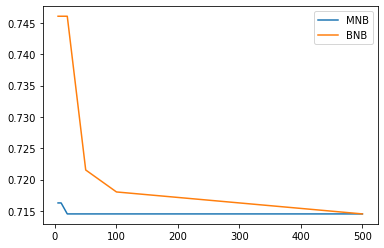

In [ ]:
Alpha_list = [5,10,20,50,100,500]

m_acc=[]
b_acc=[]
for i in Alpha_list:
    mnb = MultinomialNB(alpha=i)
    bnb = BernoulliNB(alpha=i)
    
    mnb.fit(X_train, y_train)
    acc = mnb.score(X_test, y_test)
    #print("\nMNB with aplha =", i ," score is %f " %acc)
    m_acc.append(acc)

    
    bnb.fit(X_train, y_train)
    acc = bnb.score(X_test, y_test)
    #print("BNB with aplha =", i ," score is %f " %acc)
    b_acc.append(acc)

plt.plot(Alpha_list,m_acc,label="MNB")
plt.plot(Alpha_list,b_acc,label="BNB")
plt.legend()
plt.show()

> For large values of the smoothing parameter, every instance is predicted to be the majority-class - effectively, this is the same behaviour as 0-R!

### Exercise 4.
The transformation of the data in Q2 implicitly creates ordinal attributes. At first glance, such a strategy does seem reasonable in light of the given values (such as *small, med, big*).
A different strategy would be to `binarise` the attributes: to replace a categorical attribute having `m` values with `m binary attributes`. One way of doing this in scikit-learn is using the **OneHotEncoder** :

```python
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(X)
X_trans = ohe.transform(X).toarray()
```

Note that this transformation should be done before we split the data into training and test sets. (Why?)

- **(a)** Check the shape of `X_trans` — how many attributes do we have now? Does this correspond to your expectations?

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(X)
X_trans_ohe = ohe.transform(X).toarray()
X_trans = pd.DataFrame(X_trans_ohe)

print(X_trans.shape)
print('X:', X.iloc[0].values)
print('X_trans:', X_trans.iloc[0].values.astype(int))


(1728, 21)
X: ['vhigh' 'vhigh' '2' '2' 'small' 'low']
X_trans: [0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0]


- **(b)** Split the dataset comprised of `one–hot attributes` into **train** and **test** sets. Compare the accuracies of the three Naive Bayes models using ordinal attributes with the three models using `one–hot attributes`: are you surprised? What can we infer?



In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb_accs = []
mnb_accs = []
bnb_accs = []
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.33, random_state=i)
    gnb.fit(X_train, y_train)
    acc = gnb.score(X_test, y_test)
    print("\nGNB score %f " %acc)
    gnb_accs.append(acc)
    
    mnb.fit(X_train, y_train)
    acc = mnb.score(X_test, y_test)
    print("MNB score %f " %acc)
    mnb_accs.append(acc)
    
    bnb.fit(X_train, y_train)
    acc = bnb.score(X_test, y_test)
    print("BNB score %f " %acc)
    bnb_accs.append(acc)
    
print('\nAvg GNB score: {}'.format(np.mean(gnb_accs)))
print('Avg MNB score: {}'.format(np.mean(mnb_accs)))
print('Avg BNB score: {}'.format(np.mean(bnb_accs)))


GNB score 0.793345 
MNB score 0.816112 
BNB score 0.837128 

GNB score 0.824869 
MNB score 0.865149 
BNB score 0.891419 

GNB score 0.789842 
MNB score 0.814361 
BNB score 0.858144 

Avg GNB score: 0.8026853473438411
Avg MNB score: 0.8318739054290717
Avg BNB score: 0.8622300058377116


*This is a fairly drastic difference: Bernoulli NB is still the best option, but both Gaussian and Multinomial NB are no longer useless. It appears that all of these learners can identify meaningful patterns, just by taking the attribute value in isolation (and not in relation to the presumed ordering) - and so, perhaps our original assignment of 0,1,2,3 was too simple to discover patterns.*

*At this point, we can also observe that the default behaviour of scikit-learn's Bernoulli NB is to do ... something ... with non-binary attributes, but it is usually better to make them explicitly binary using the one-hot transformer. (If you're curious, in this case, it's treating whichever value is 0 as "N", and the other values as "Y".)*

### Exercise 5.

Now let's check other metrics results.

In [ ]:
from sklearn.metrics import classification_report

gnb.fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)

mnb.fit(X_train, y_train)
mnb_predictions = mnb.predict(X_test)

bnb.fit(X_train, y_train)
bnb_predictions = bnb.predict(X_test)

print("\n\n ===========\n MNB FULL RESULTS\n===========")
print(classification_report(y_test,mnb_predictions))

print("\n\n ===========\n BNB FULL RESULTS\n===========")
print(classification_report(y_test,bnb_predictions))

print("\n\n ===========\n GNB FULL RESULTS\n===========")
print(classification_report(y_test,gnb_predictions))





 MNB FULL RESULTS
              precision    recall  f1-score   support

         acc       0.57      0.57      0.57       121
        good       0.50      0.21      0.29        24
       unacc       0.89      0.95      0.92       408
       vgood       1.00      0.22      0.36        18

    accuracy                           0.81       571
   macro avg       0.74      0.49      0.54       571
weighted avg       0.81      0.81      0.80       571



 BNB FULL RESULTS
              precision    recall  f1-score   support

         acc       0.65      0.78      0.71       121
        good       0.62      0.62      0.62        24
       unacc       0.95      0.91      0.93       408
       vgood       0.92      0.61      0.73        18

    accuracy                           0.86       571
   macro avg       0.79      0.73      0.75       571
weighted avg       0.87      0.86      0.86       571



 GNB FULL RESULTS
              precision    recall  f1-score   support

         acc   

- **(a)** What is the difference between macro average and weighted average? Why the results are different for Bernoulli, Multinominal and Gaussian Naive Bayes? 

#### Macro vs Micro-Average

> In multi-class classification problems, macro average and weighted average are two commonly used methods to calculate the overall performance metrics of a classifier.
- Macro average: This method calculates the average performance metrics across all classes, without taking into account the class imbalance. For example, if there are 3 classes and the precision of the classifier for each class is 0.6, 0.7 and 0.8, the macro-averaged precision would be `(0.6 + 0.7 + 0.8) / 3 = 0.7`.
- Weighted average: This method calculates the average performance metrics across all classes, taking into account the class imbalance. The weight of each class is proportional to its frequency in the dataset. For example, if there are 3 classes and the number of instances of each class is 100, 200 and 300, the weighted average precision would be `(0.6 * 100 + 0.7 * 200 + 0.8 * 300) / (100 + 200 + 300) = 0.733`.

> The difference between macro average and weighted average lies in the way they **handle class imbalance**. If the dataset is balanced, i.e. all classes have roughly the same number of instances, then the macro and weighted averages will be similar. However, if the dataset is imbalanced, i.e. some classes have many more instances than others, the weighted average will be more **influenced by the performance of the dominant classes**, while the macro average will treat all classes equally.`

#### Difference between the Naive Bayes family members
> The results for Bernoulli, Multinomial, and Gaussian Naive Bayes can be different because these models have different assumptions about the distribution of the input features.
- Bernoulli Naive Bayes assumes that the input features are binary (i.e. 0 or 1), and therefore works well for text classification problems where each feature represents the presence or absence of a word.
- Multinomial Naive Bayes assumes that the input features are discrete counts, and therefore works well for classification problems where each feature represents a frequency (e.g. words in a sentence).
- Gaussian Naive Bayes assumes that the input features are continuous and normally distributed, and therefore works well for numerical data with a Gaussian distribution.



- **(b)** In this dataset which label has the best F1-score along all different NB models? Can explain the reason.

> The label with the highest F1-score is `"unacc"` due to its high frequency among the available labels in the dataset. Since a majority of the instances in the dataset are labeled as `"unacc"`, the model has been trained well to accurately predict this label for most instances, leading to a higher F1-score for this label.

## Challenge Question
In this dataset which label has the worst F1-score along all different NB models? Can you explain the reason?

(Note: this is not the absolute answer. I'm just giving ideas)

> 
- MNB: features with few representation data got the worst F1 scores: `good` and `vgood`. MNB relies heavily on data occurence.
- BNB: `good` got the worst F1 scores. Likely that the features of this label are still hard to distinguish from others.
- GNB: `acc` got the worst F1 score followed by `good` despite having many representing instances. It is likely that the GNB assumed the distribution in the order of labels given, that might have been different from the true order.

### Some useful tools for display: Confusion matrix and `seaborn` package

Helps you to see well on how the predictions look like!

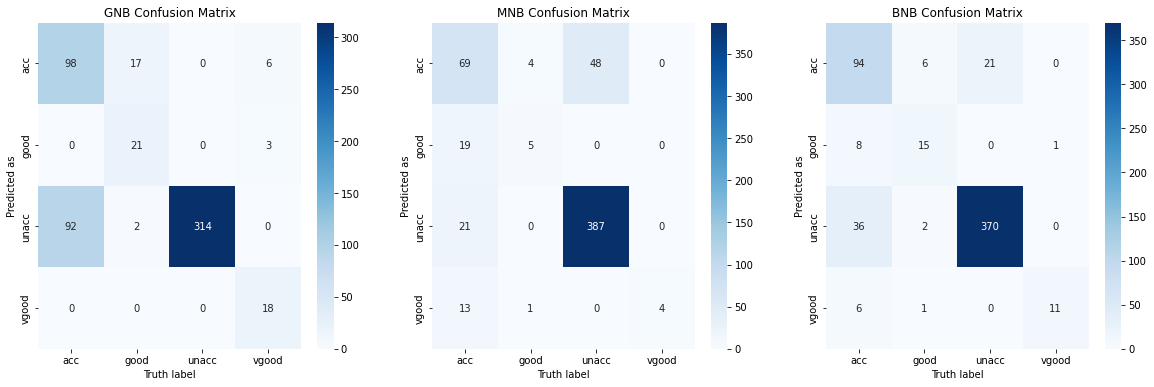

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

_, ax = plt.subplots(1,3,figsize=(20,6))

gnb_cf = confusion_matrix(y_test,gnb_predictions)
mnb_cf = confusion_matrix(y_test,mnb_predictions)
bnb_cf = confusion_matrix(y_test,bnb_predictions)
titles = ['GNB','MNB','BNB']

for i,cf in enumerate([gnb_cf,mnb_cf,bnb_cf]):
  sns.heatmap(cf, ax=ax[i], 
              cmap = 'Blues',
              fmt = 'd',
              xticklabels=unique_labels, 
              yticklabels=unique_labels, 
              annot=True)
  ax[i].set_title(f'{titles[i]} Confusion Matrix')
  ax[i].set_xlabel('Truth label')
  ax[i].set_ylabel('Predicted as')